## Observations and Insights

In [ ]:
# ##Obserations and Insights
# Cap and Rem were far and away the best preformers. Everything else was on par with the placebo
# The mouse I chose to graph time vs tumor volume (s185), did have a steady decreace in volume as time passed....confirming the drugs usefulness
# Ketapril was the worst of all the drugs, actually worse than the placebo

## Dependencies and starter code

In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset

In [13]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


## Summary statistics

In [14]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [15]:
df1 = pd.merge(study_results,mouse_metadata, on=["Mouse ID"])
df2=df1.sort_values('Tumor Volume (mm3)', ascending=False)
tumordata = df2.groupby('Drug Regimen')
tumordata.count()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181
Propriva,161,161,161,161,161,161,161
Ramicane,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181


In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tmean = tumordata['Tumor Volume (mm3)'].mean()
tmed = tumordata['Tumor Volume (mm3)'].median()
tstd = tumordata['Tumor Volume (mm3)'].std()
tvar = tumordata['Tumor Volume (mm3)'].var()
tSEM = tumordata['Tumor Volume (mm3)'].sem()
Tumor_Table = pd.DataFrame({"Mean": tmean, "Median":tmed, "Standard Deviation":tstd,"Variance":tvar,"SEM":tSEM})
Tumor_Table

,Mean,Median,Standard Deviation,Variance,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.322552,50.854632,6.507770,42.351070,0.512884
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


## Bar plots

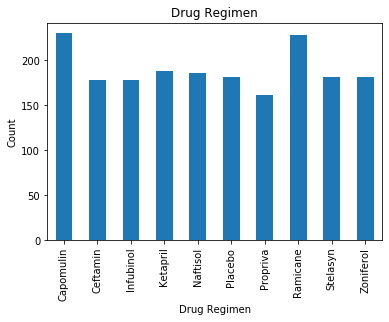

In [17]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
sum = tumordata['Mouse ID'].count()
plt.xlabel("Drug Regimen")
plt.ylabel('Count')
plt.title('Number of Data Points for Drugs')
sum.plot(kind='bar', title="Drug Regimen")
plt.show()

In [18]:
labels = mouse_metadata["Drug Regimen"].unique()
labels = sorted(labels)

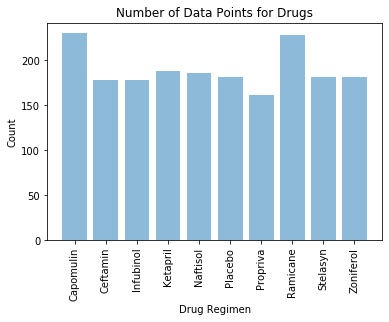

In [19]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
y_axis = tumordata['Mouse ID'].count()
x_axis = np.arange(len(y_axis))
# labels = mouse_metadata["Drug Regimen"].unique()
plt.bar(x_axis,y_axis, alpha=0.5, align="center")
plt.xlabel("Drug Regimen")
plt.ylabel('Count')
plt.title('Number of Data Points for Drugs')
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, labels, rotation='vertical')
plt.show()

## Pie plots

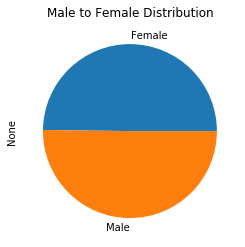

125    1
124    1
dtype: int64


In [22]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
genderdata = mouse_metadata.groupby("Sex").size()
plt.title('Male to Female Distribution')

genderdata.plot(kind="pie")
plt.show()
print(genderdata.value_counts())

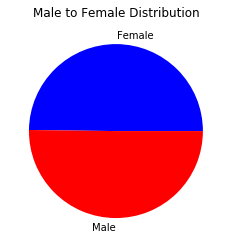

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

value = genderdata
labels = ["Female","Male"]
color = ["blue", "red"]
plt.title('Male to Female Distribution')
plt.pie(value, labels=labels,colors=color)
plt.show()

## Quartiles, outliers and boxplots

In [25]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
# successful = Capomulin, Ramicane, Infubinol, and Ceftamin
df2 = df2.rename(columns={"Drug Regimen": "Drug"})
#last volume
df2['Last Tumor Volume'] = df2.groupby("Mouse ID")["Tumor Volume (mm3)"].transform('first')
#dataframe for specific drugs
#pulling Last Tumor Value
#sorting data

In [26]:
dfCap = df2[df2.Drug == 'Capomulin']
Cap = dfCap['Last Tumor Volume']
Cap.sort_values()
quartiles = Cap.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile of Capomulin is: {lowerq}")
print(f"The upper quartile of Capomulin is: {upperq}")
print(f"The interquartile range of Capomulin is: {iqr}")
print(f"The the median of Capomulin is: {quartiles[0.5]} ")
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Capomulin is: 45.118438255
The upper quartile of Capomulin is: 46.80922469
The interquartile range of Capomulin is: 1.6907864349999997
The the median of Capomulin is: 45.89372032 
Values below 42.582258602500005 could be outliers.
Values above 49.345404342500004 could be outliers.


In [27]:
dfRam = df2[df2.Drug == 'Ramicane']
Ram = dfRam['Last Tumor Volume']
Ram.sort_values()
quartiles = Ram.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile of Ramicane is: {lowerq}")
print(f"The upper quartile of Ramicane is: {upperq}")
print(f"The interquartile range of Ramicane is: {iqr}")
print(f"The the median of Ramicane is: {quartiles[0.5]} ")
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ramicane is: 45.0
The upper quartile of Ramicane is: 46.34383237
The interquartile range of Ramicane is: 1.3438323700000012
The the median of Ramicane is: 45.52187471 
Values below 42.984251445 could be outliers.
Values above 48.359580925 could be outliers.


In [28]:
dfInf = df2[df2.Drug == 'Infubinol']
Inf = dfInf['Last Tumor Volume']
Inf.sort_values()
quartiles = Inf.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile of Infubinol is: {lowerq}")
print(f"The upper quartile of Infubinol is: {upperq}")
print(f"The interquartile range of Infubinol is: {iqr}")
print(f"The the median of Infubinol is: {quartiles[0.5]} ")
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Infubinol is: 57.03186187
The upper quartile of Infubinol is: 66.19691151
The interquartile range of Infubinol is: 9.165049640000007
The the median of Infubinol is: 62.276341445 
Values below 43.28428740999999 could be outliers.
Values above 79.94448597000002 could be outliers.


In [29]:
dfCef = df2[df2.Drug == 'Ceftamin']
Cef = dfCef['Last Tumor Volume']
Cef.sort_values()
quartiles = Inf.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile of Infubinol is: {lowerq}")
print(f"The upper quartile of Infubinol is: {upperq}")
print(f"The interquartile range of Infubinol is: {iqr}")
print(f"The the median of Infubinol is: {quartiles[0.5]} ")
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Infubinol is: 57.03186187
The upper quartile of Infubinol is: 66.19691151
The interquartile range of Infubinol is: 9.165049640000007
The the median of Infubinol is: 62.276341445 
Values below 43.28428740999999 could be outliers.
Values above 79.94448597000002 could be outliers.


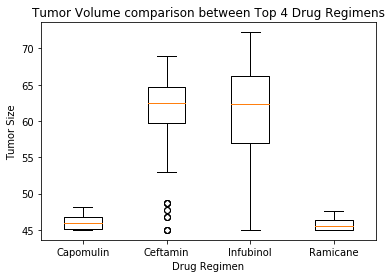

In [30]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, ax = plt.subplots()
ax.set_title('Tumor Volume comparison between Top 4 Drug Regimens')
ax.set_ylabel('Tumor Size')
ax.set_xlabel('Drug Regimen')
ax.set_xticklabels(['Capomulin', 'Ceftamin', 'Infubinol', 'Ramicane'])
data_to_plot = [Cap, Cef, Inf, Ram]
ax.boxplot(data_to_plot)
plt.show()

## Line and scatter plots

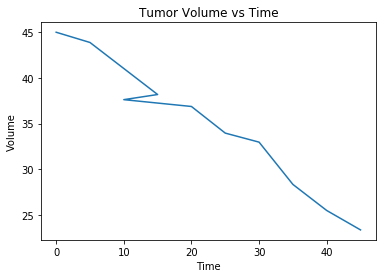

In [31]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
dfCap = dfCap.rename(columns={"Mouse ID": "ID"})
mouse = dfCap[dfCap.ID == 's185']
time = mouse['Timepoint']
volume = mouse['Tumor Volume (mm3)']
plt.xlabel('Time')
plt.title('Tumor Volume vs Time')
plt.ylabel('Volume')
plt.plot(time, volume)
plt.show()

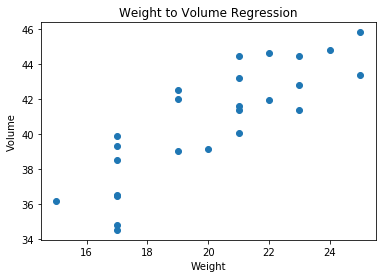

In [32]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capmouse = dfCap.groupby("ID")
weight = (capmouse['Weight (g)']).mean()
avgvol = (capmouse['Tumor Volume (mm3)']).mean()
plt.title('Weight to Volume Regression')
plt.xlabel('Weight')
plt.ylabel('Volume')
plt.scatter(weight, avgvol)
plt.show()


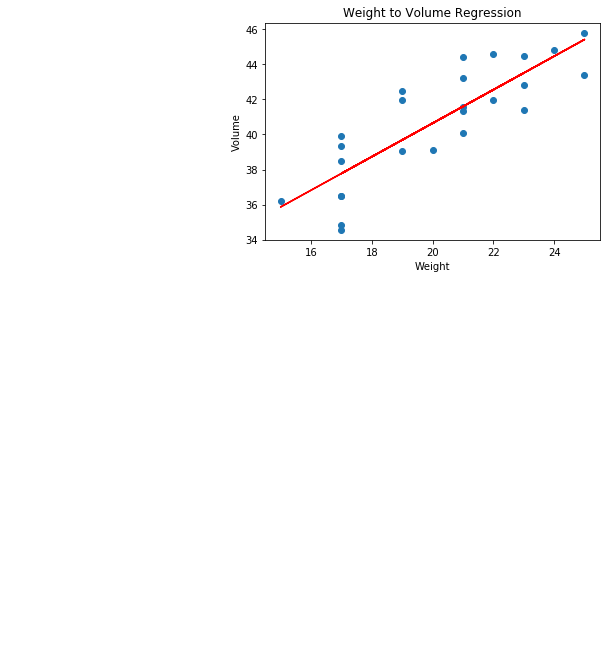

0.8419363424694722


In [33]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, avgvol)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title('Weight to Volume Regression')
plt.xlabel('Weight')
plt.ylabel('Volume')
plt.scatter(weight, avgvol)
plt.plot(weight,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()
print(rvalue)